In [12]:
import pandas as pd
import numpy as np
from numpy import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
df_adult_eda=pd.read_csv("Census_Income.csv")
df_adult_eda

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
df_adult_eda.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [27]:
df_adult_eda.shape


(32560, 15)

In [28]:
df_adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
df_adult_eda.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
df_adult_eda.columns = df_adult_eda.columns.str.replace(' ', '')
df_adult_eda.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [33]:
df_adult_eda['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [35]:
print(df_adult_eda.shape)

df_adult_eda = df_adult_eda.drop_duplicates(keep = 'first')
df_adult_eda.shape

(32536, 15)


(32536, 15)

In [36]:
df_adult_eda.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [38]:
df_adult_eda['Age'].nunique()

73

In [39]:
df_adult_eda['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [40]:
df_adult_eda.isnull().sum(axis = 0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [42]:
df_adult_eda[df_adult_eda['Native_country'] == '?'].shape

(0, 15)

In [43]:
for i in df_adult_eda.columns:
    t = df_adult_eda[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in Age
0
The Value Counts of ? in Workclass
0
The Value Counts of ? in Fnlwgt
0
The Value Counts of ? in Education
0
The Value Counts of ? in Education_num
0
The Value Counts of ? in Marital_status
0
The Value Counts of ? in Occupation
0
The Value Counts of ? in Relationship
0
The Value Counts of ? in Race
0
The Value Counts of ? in Sex
0
The Value Counts of ? in Capital_gain
0
The Value Counts of ? in Capital_loss
0
The Value Counts of ? in Hours_per_week
0
The Value Counts of ? in Native_country
0
The Value Counts of ? in Income
0


In [51]:
df_adult_eda['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [52]:
df_adult_eda.at[df_adult_eda['Age'].idxmin(),'Age']

17

The maximum age is 90
The minimum age is 17


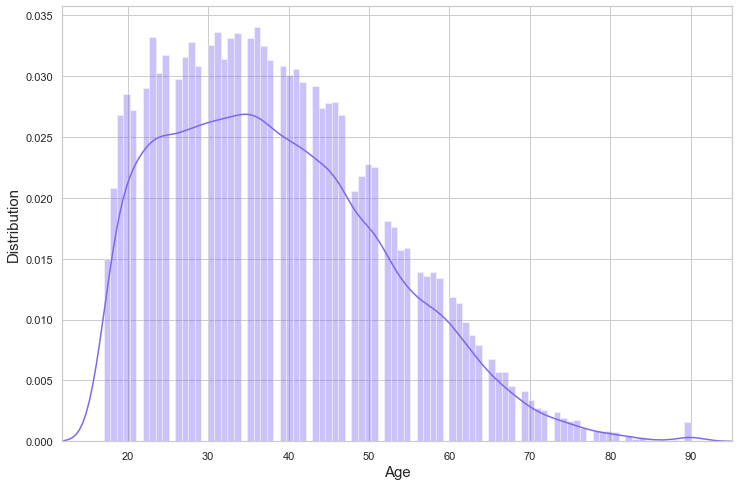

In [55]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_adult_eda['Age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_adult_eda['Age'].max())
print ("The minimum age is", df_adult_eda['Age'].min())

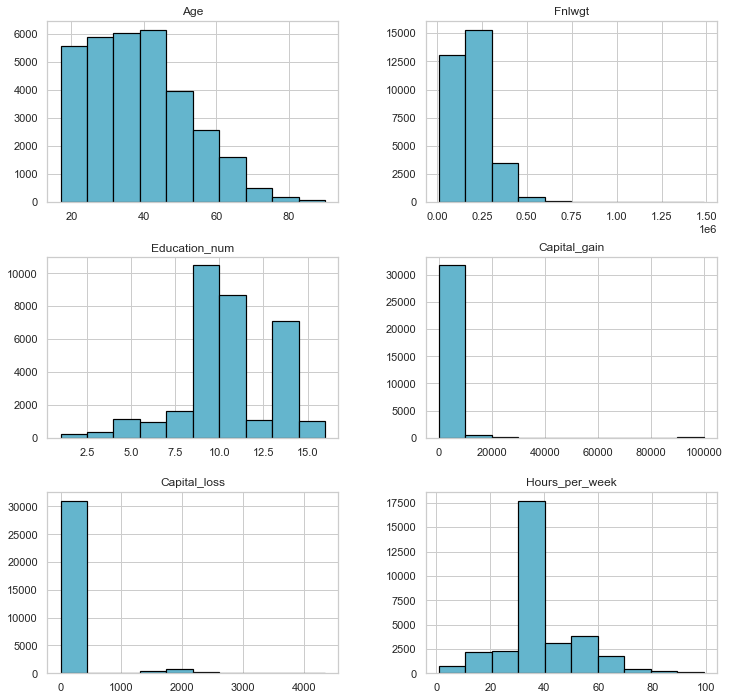

In [56]:
distribution = df_adult_eda.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [59]:
print (df_adult_eda['Hours_per_week'].median())
print (df_adult_eda['Hours_per_week'].mean())

40.0
40.440343004671746


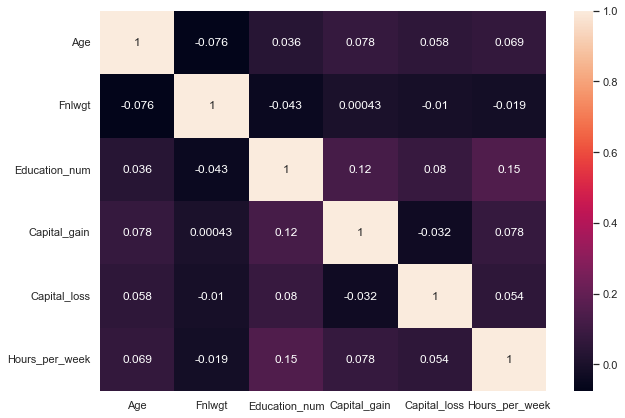

In [60]:
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_adult_eda.corr(), annot = True);

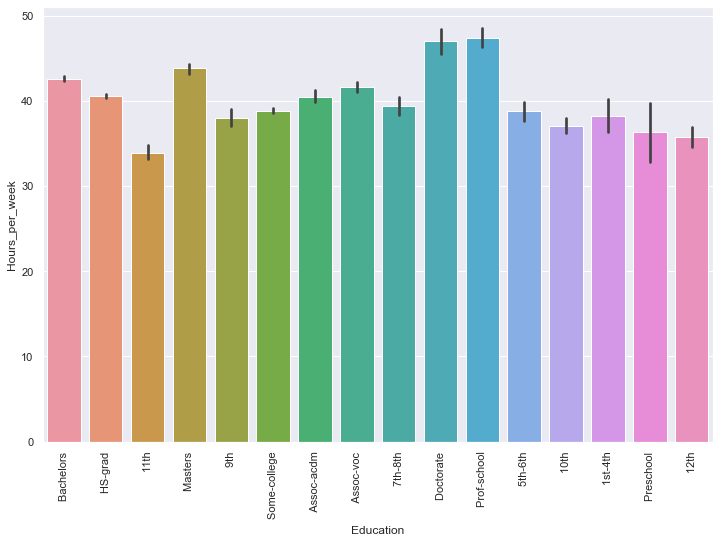

In [62]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df_adult_eda['Education'], y = df_adult_eda['Hours_per_week'], data = df_adult_eda)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

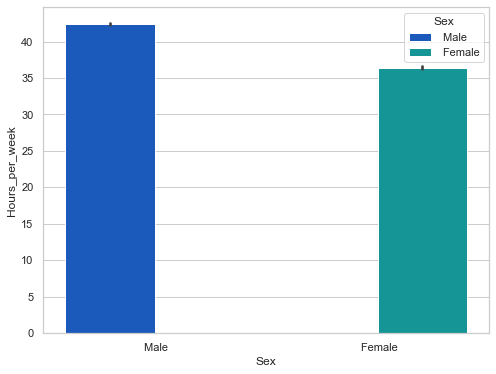

In [63]:
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df_adult_eda['Sex'], y = df_adult_eda['Hours_per_week'], data = df_adult_eda,
            estimator = mean, hue = 'Sex', palette = 'winter');

In [77]:
df_adult_eda['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [78]:
df_adult_eda_ = df_adult_eda[df_adult_eda['Native_country'] != '?']
native_more = df_adult_eda_.loc[df_adult_eda_['Income'] == '>50K',['Native_country']].groupby('Native_country').size()
native_less = df_adult_eda_.loc[df_adult_eda_['Income'] == '<=50K',['Native_country']].groupby('Native_country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

[]
0
[]
0


In [79]:
[country for country in index_less if country not in index_more]

[]

In [80]:
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
40,Holand-Netherlands,0
41,Outlying-US(Guam-USVI-etc),0


In [81]:
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,<=50K,Countries,>50K


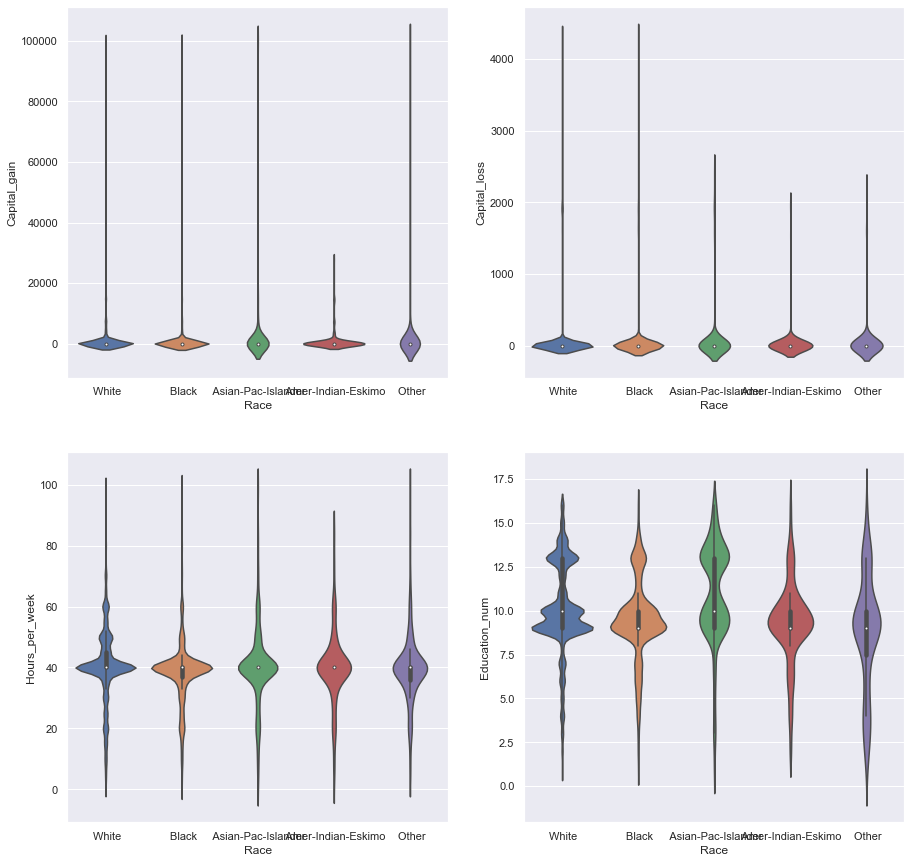

In [86]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df_adult_eda['Race'], y = df_adult_eda['Capital_gain'], data = df_adult_eda);
plt.subplot(2,2,2)
sns.violinplot(x = df_adult_eda['Race'], y = df_adult_eda['Capital_loss'], data = df_adult_eda);
plt.subplot(2,2,3)
sns.violinplot(x = df_adult_eda['Race'], y = df_adult_eda['Hours_per_week'], data = df_adult_eda);
plt.subplot(2,2,4)
sns.violinplot(x = df_adult_eda['Race'], y = df_adult_eda['Education_num'], data = df_adult_eda);

In [94]:
df_adult = df_adult_eda.copy()

df_adult = df_adult.reset_index(drop = True)
df_adult.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [95]:
df_adult.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [97]:
df_adult = df_adult[df_adult.Occupation != '?']

print (df_adult['Occupation'].value_counts())

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


In [98]:
df_adult.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [100]:
df_adult['Income'] = df_adult['Income'].map({'<=50K':0, '>50K':1})

In [101]:
df_adult['Income'].value_counts()

Series([], Name: Income, dtype: int64)

In [102]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df_adult.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])

df_adult.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,NaN
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,NaN
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,NaN
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,NaN
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,NaN


In [103]:
from sklearn.utils import shuffle
df_adult = shuffle(df_adult)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df_adult.drop(columns = ['Income', 'Education_num'])
target = df_adult['Income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (22775, 13)
Test data set size :  (9761, 13)


# THANKYOU